# For Data processing

In [22]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

## Check data

In [2]:
tcc = pd.read_csv(r"D:\BaiduNetdiskDownload\【特征工程】电信用户流失案例\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
pd.set_option('max_colwidth',200)
tcc.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
tcc.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

<AxesSubplot:>

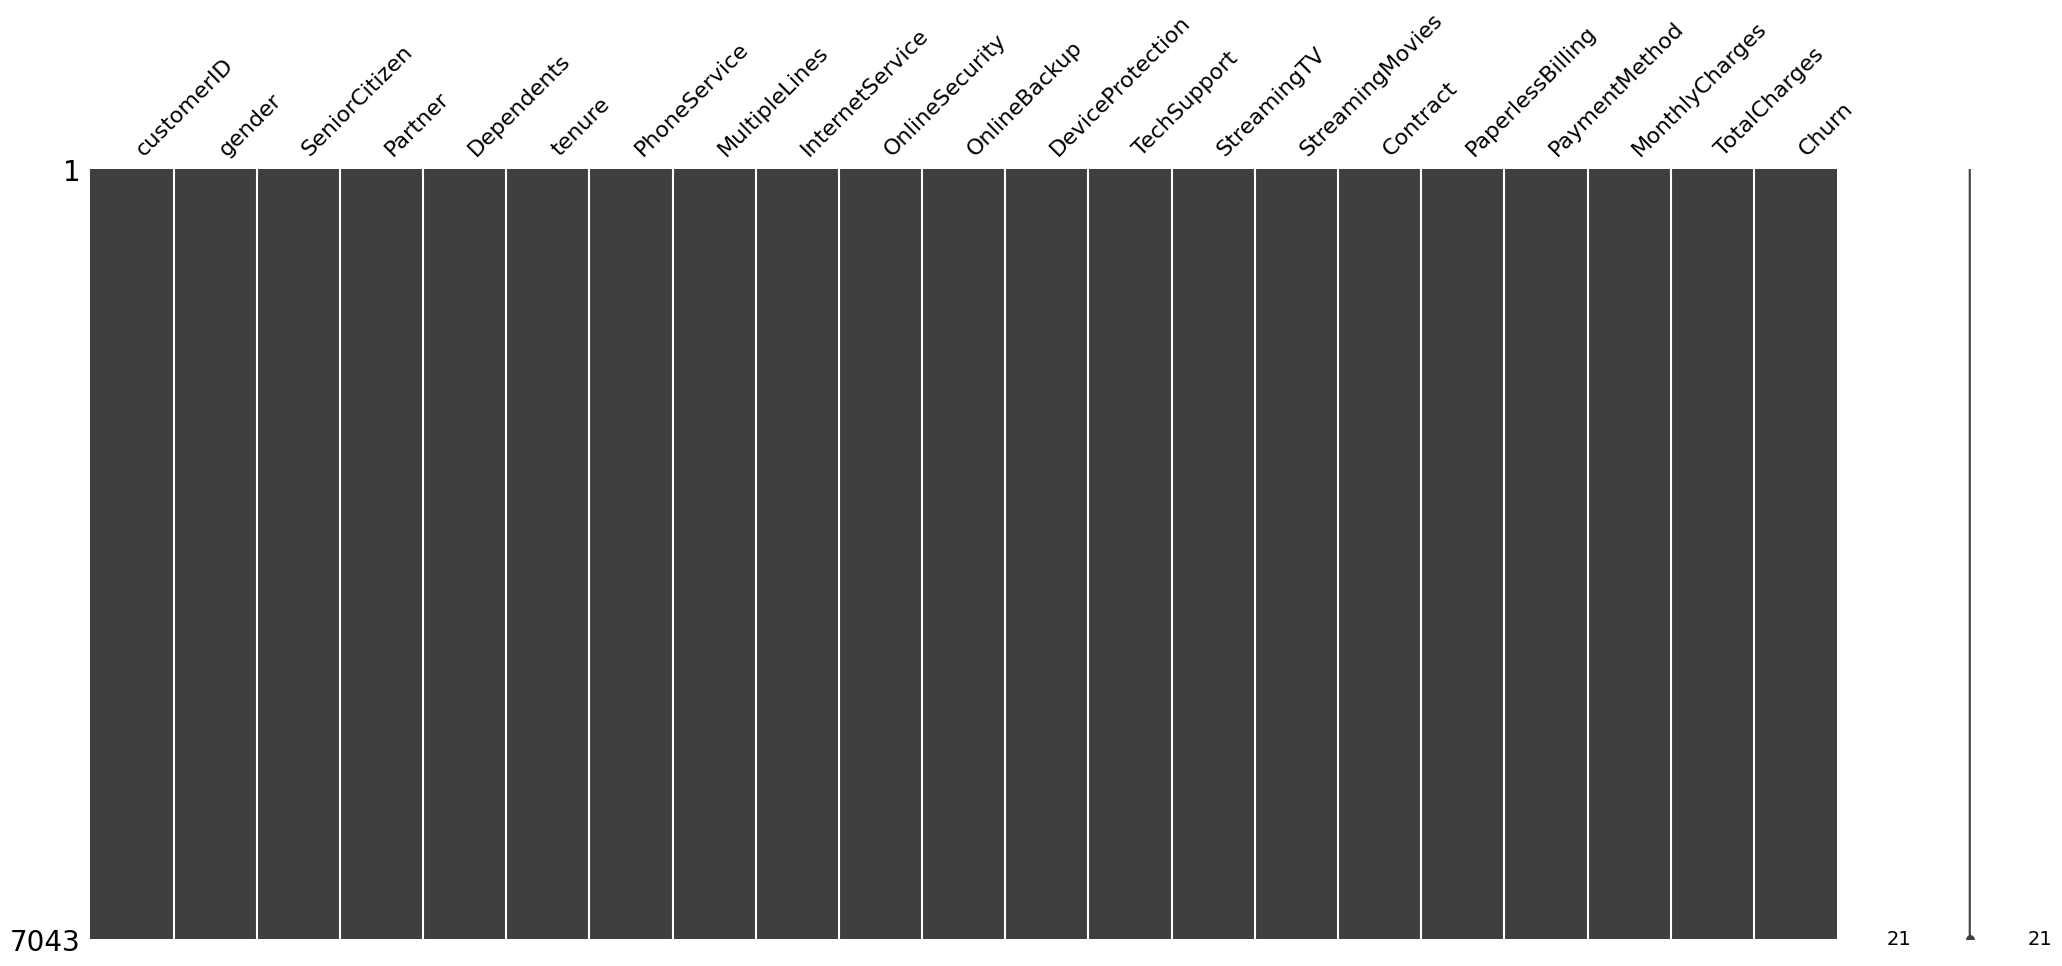

In [7]:
# check null values
msno.matrix(tcc)

## Check type of characters

In [8]:
# time series processing
tcc['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [9]:
tcc['tenure'].nunique() #73 different days

73

In [10]:
# discrete
category_cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                'PaymentMethod']

# continuous
numeric_cols = ['MonthlyCharges', 'TotalCharges']

# labels
target = 'Churn'

# assert
assert len(category_cols) + len(numeric_cols) + 1 == tcc.shape[1]

In [11]:
tcc[category_cols].nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
dtype: int64

In [12]:
# check if ' ' exist 
# cuz ' ' generally is not show null values

def find_index(data_col, val):
    """
    find the index of first appearing option
    if not returen -1
    
    : data_col: find col
    : val: values
    """
    val_list = [val]
    if data_col.isin(val_list).sum() == 0:
        index = -1
    else:
        index = data_col.isin(val_list).idxmax()
    return index

In [13]:
for col in numeric_cols:
    print(find_index(tcc[col],' '))

-1
488


In [14]:
tcc['TotalCharges'].iloc[488]

' '

In [15]:
tcc['TotalCharges']= tcc['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)
tcc['MonthlyCharges'] = tcc['MonthlyCharges'].astype(float)

<AxesSubplot:>

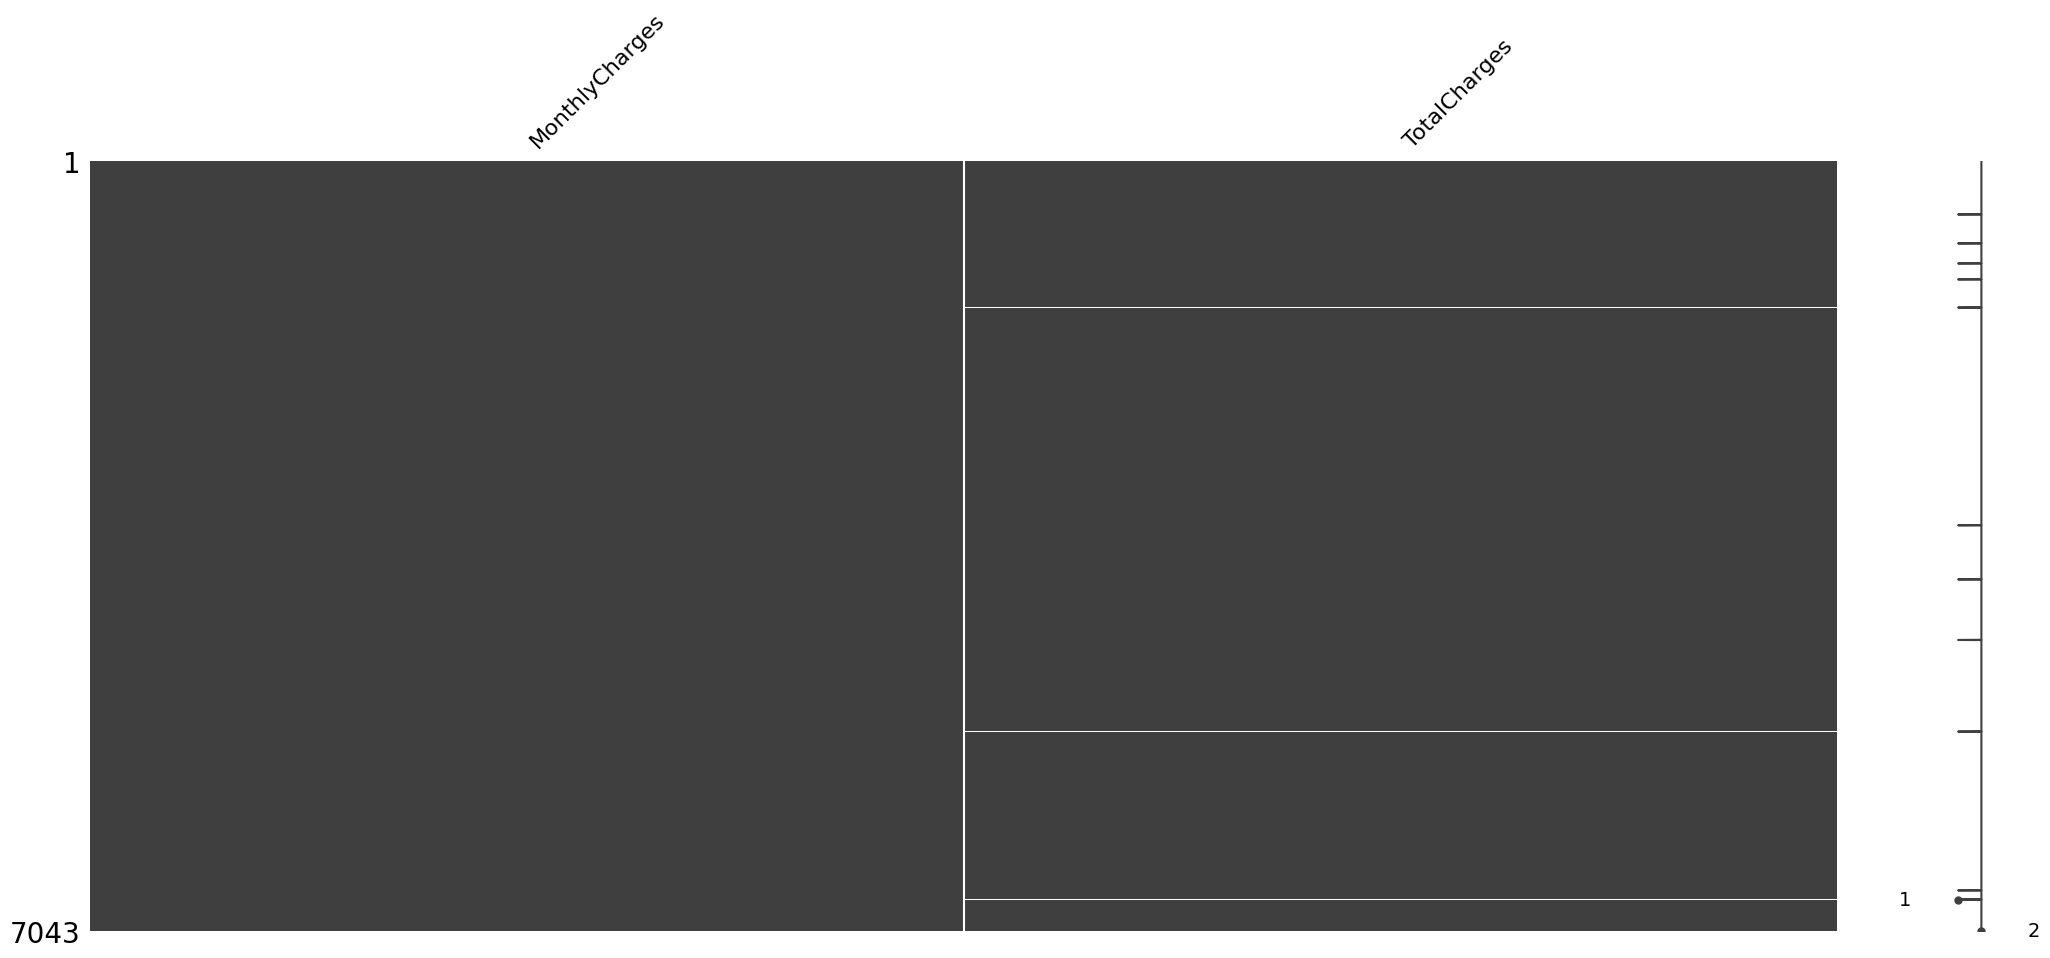

In [17]:
msno.matrix(tcc[numeric_cols])

In [18]:
tcc['TotalCharges'].fillna(tcc['TotalCharges'].mean())

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [19]:
tcc[tcc['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [20]:
tcc['TotalCharges'] = tcc['TotalCharges'].fillna(0)

### check outlier

In [21]:
tcc[numeric_cols].describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2279.734304
std,30.090047,2266.794470
min,18.250000,0.000000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


In [23]:
# MonthlyCharges上四分位数
Q3 = tcc[numeric_cols].describe()['MonthlyCharges']['75%']
Q3

89.85

In [24]:
# MonthlyCharges下四分位数
Q1 = tcc[numeric_cols].describe()['MonthlyCharges']['25%']
Q1

35.5

In [25]:
# MonthlyCharges的四分位距
IQR = Q3 - Q1
IQR

54.349999999999994

Text(0.5, 0, 'TotalCharges')

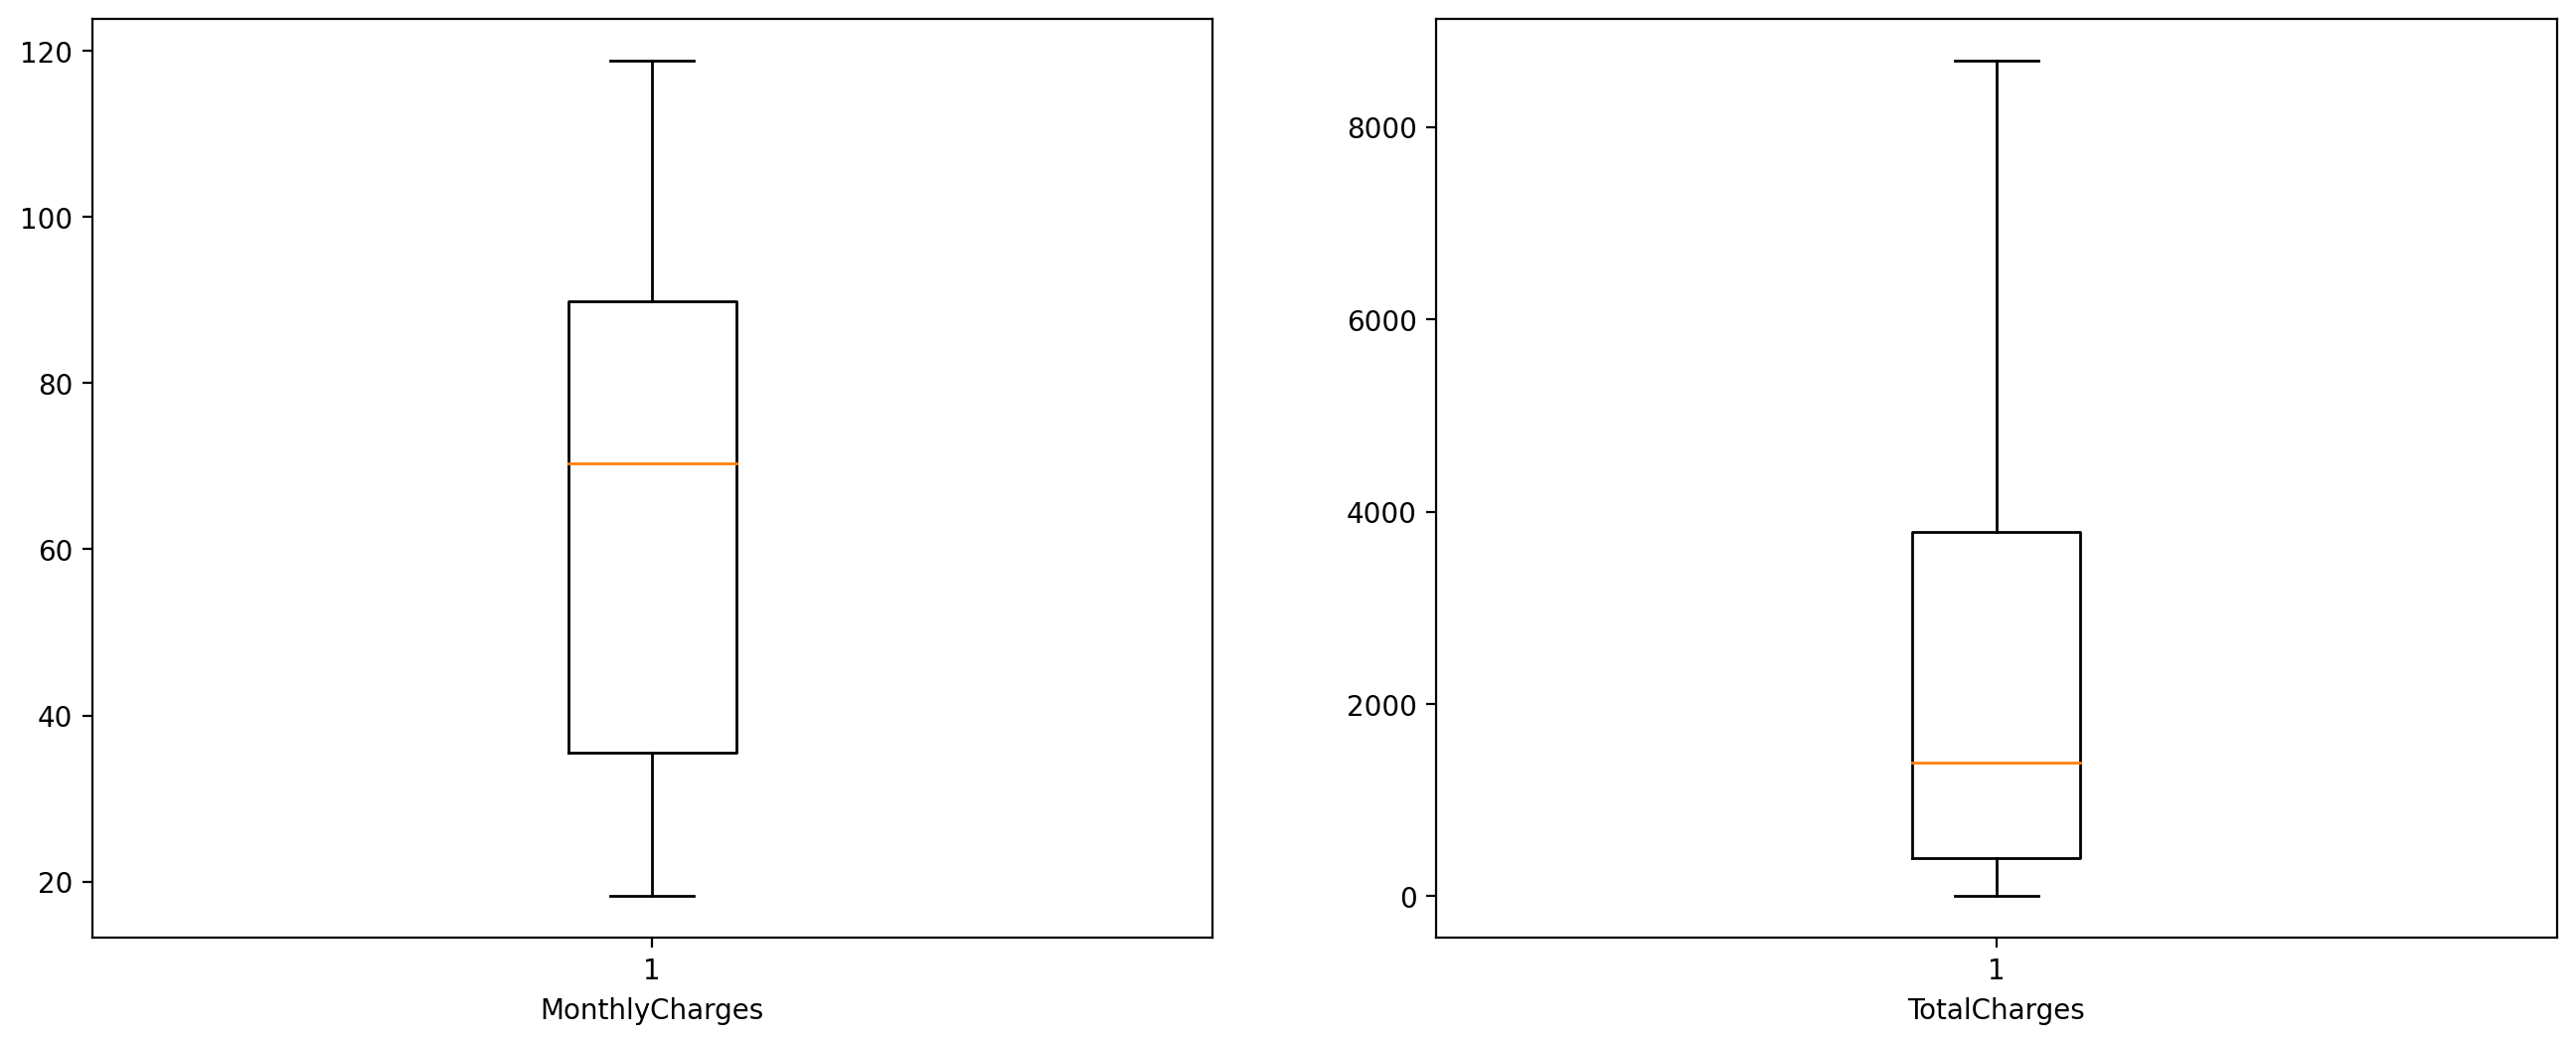

In [26]:
Q3 = tcc[numeric_cols].describe()['TotalCharges']['75%']
Q1 = tcc[numeric_cols].describe()['TotalCharges']['25%']
IQR = Q3 - Q1
(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

plt.figure(figsize=(16, 6), dpi=200)
plt.subplot(121)
plt.boxplot(tcc['MonthlyCharges'])
plt.xlabel('MonthlyCharges')
plt.subplot(122)
plt.boxplot(tcc['TotalCharges'])
plt.xlabel('TotalCharges')

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

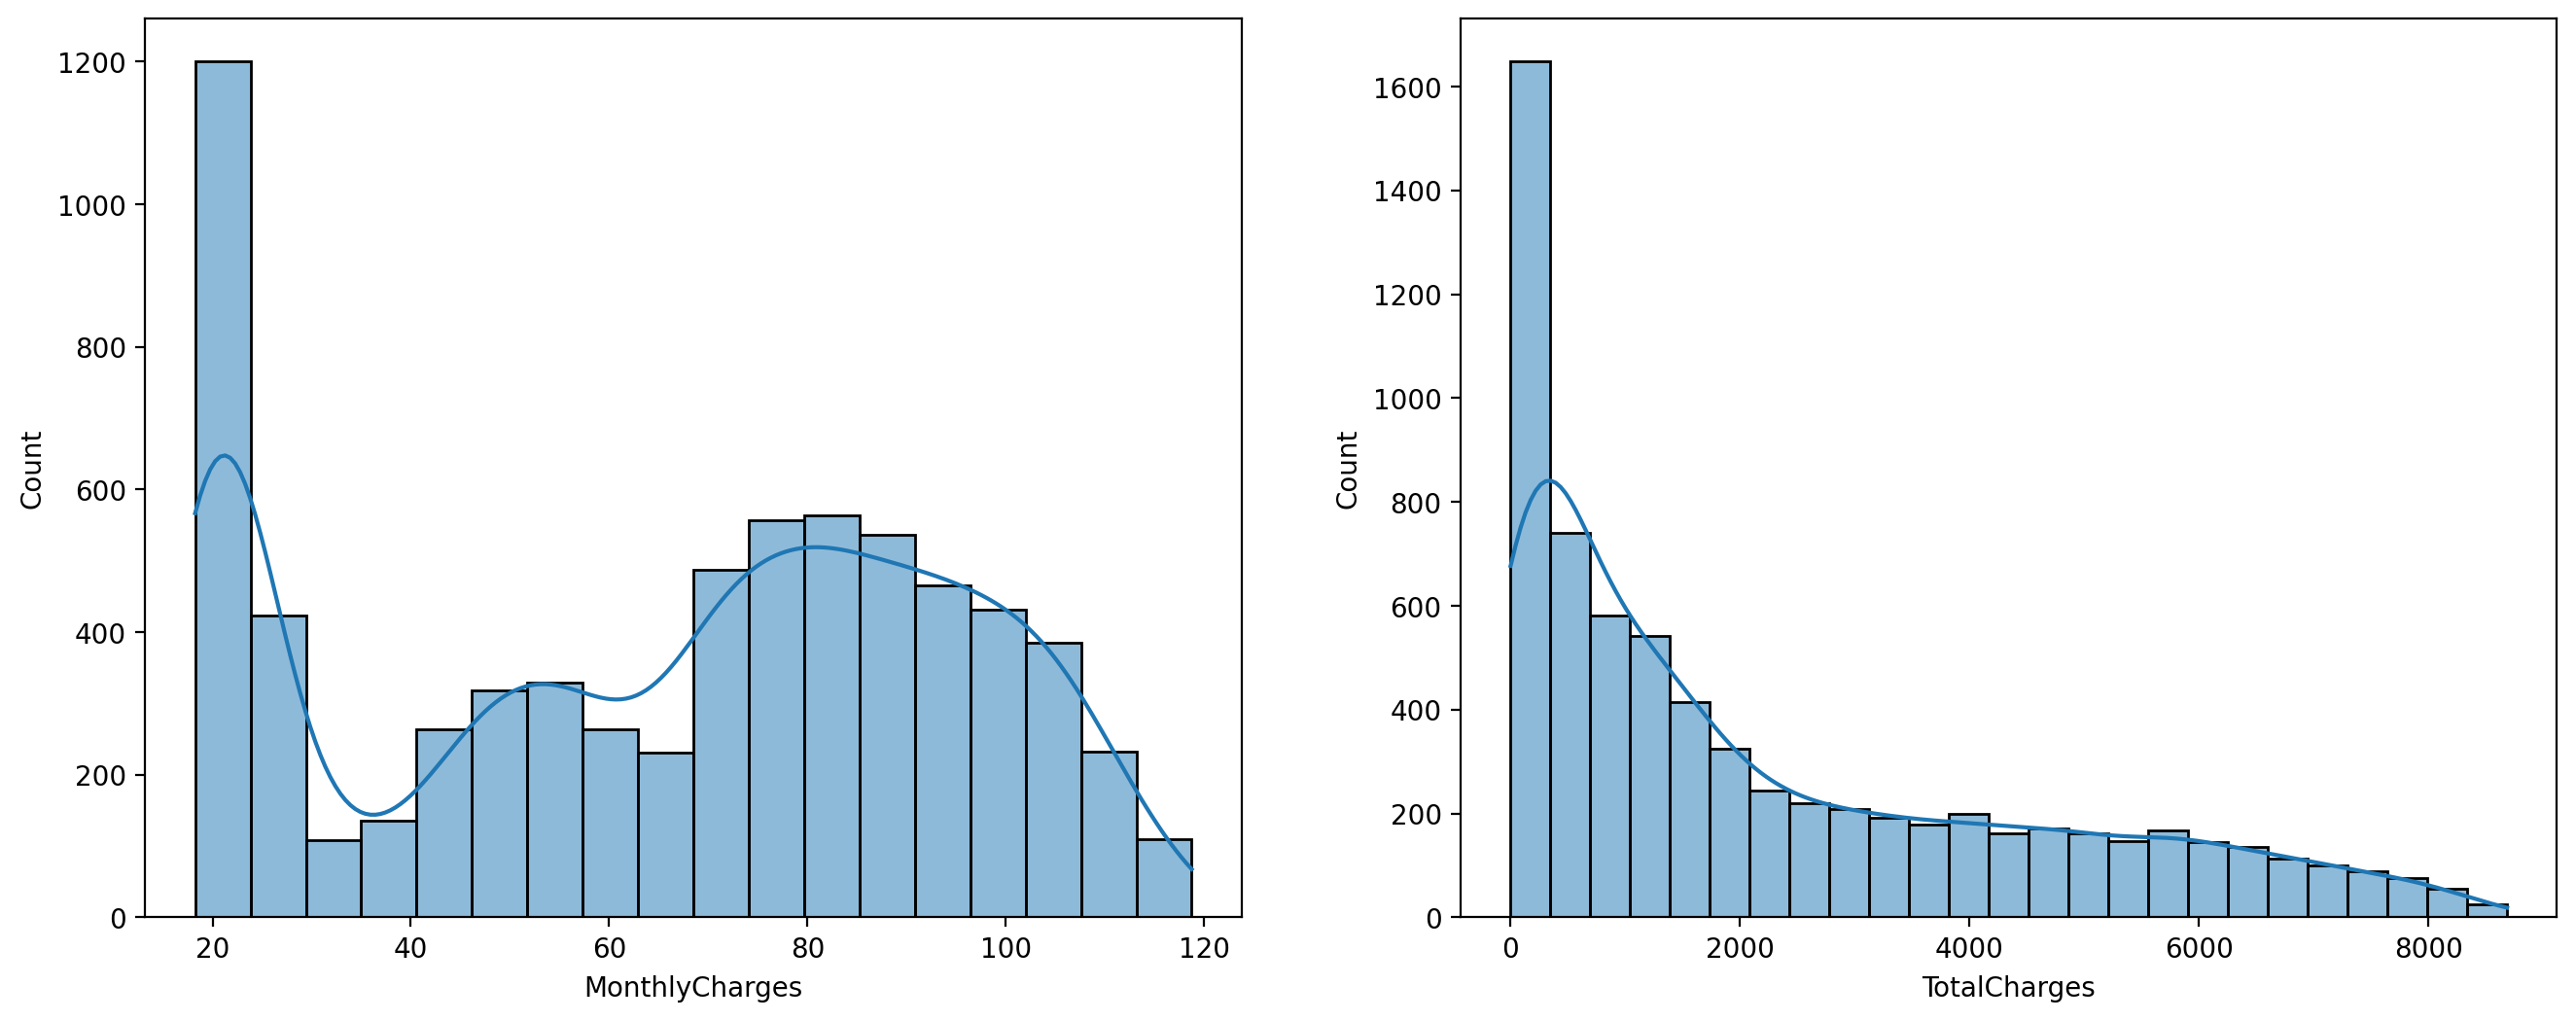

In [27]:
plt.figure(figsize=(16, 6), dpi=200)
plt.subplot(121)
sns.histplot(tcc['MonthlyCharges'], kde=True) 
plt.subplot(122)
sns.histplot(tcc['TotalCharges'], kde=True)

In [28]:
y = tcc['Churn']
print(f'Percentage of Churn:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} customer)\nPercentage of customer did not churn: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} customer)')

Percentage of Churn:  26.54 %  --> (1869 customer)
Percentage of customer did not churn: 73.46  %  --> (5174 customer)


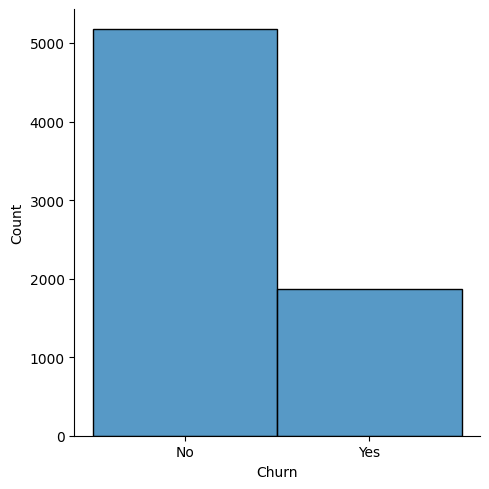

In [29]:
sns.displot(y)

In [30]:
df3 = tcc.iloc[:,1:].copy()

# 将标签Yes/No转化为1/0
df3['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df3['Churn'].replace(to_replace='No',  value=0, inplace=True)

# 将其他所有分类变量转化为哑变量，连续变量保留不变
df_dummies = pd.get_dummies(df3)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [31]:
df_dummies[['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges']]

,Churn,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,1,2,53.85,108.15
3,0,45,42.30,1840.75
4,1,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


<AxesSubplot:>

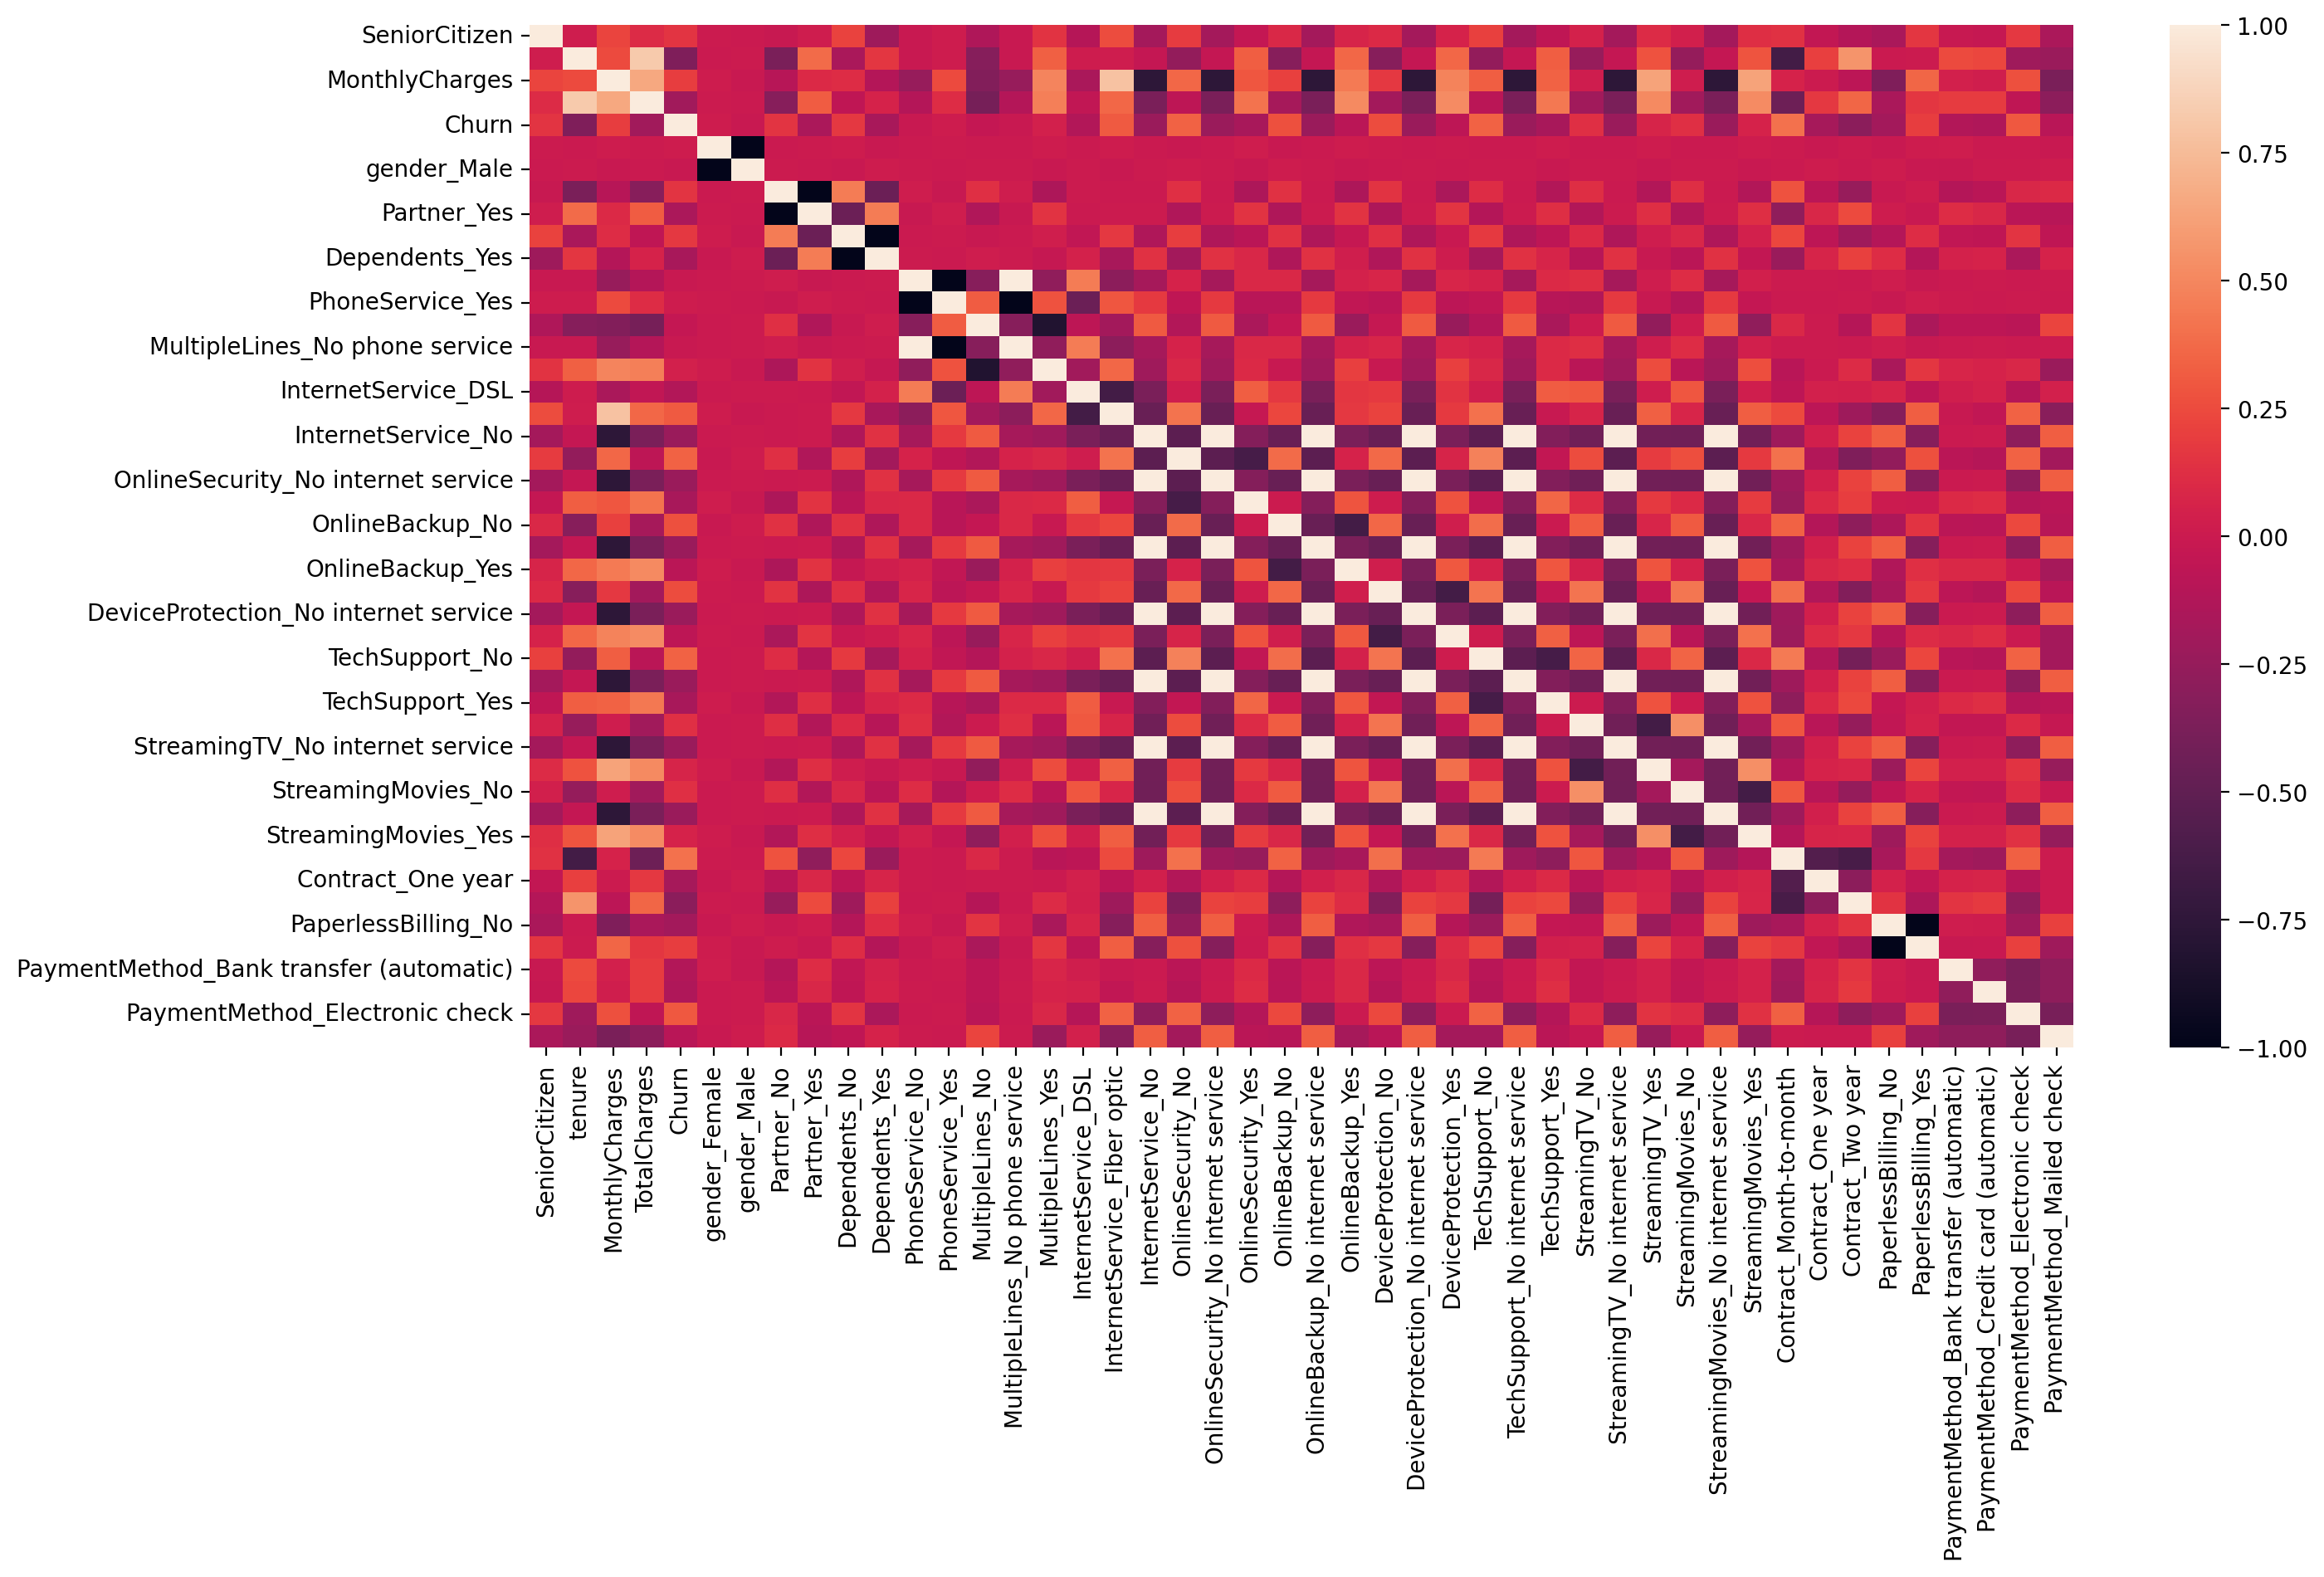

In [32]:
plt.figure(figsize=(15,8), dpi=200)
sns.heatmap (df_dummies.corr())

<AxesSubplot:>

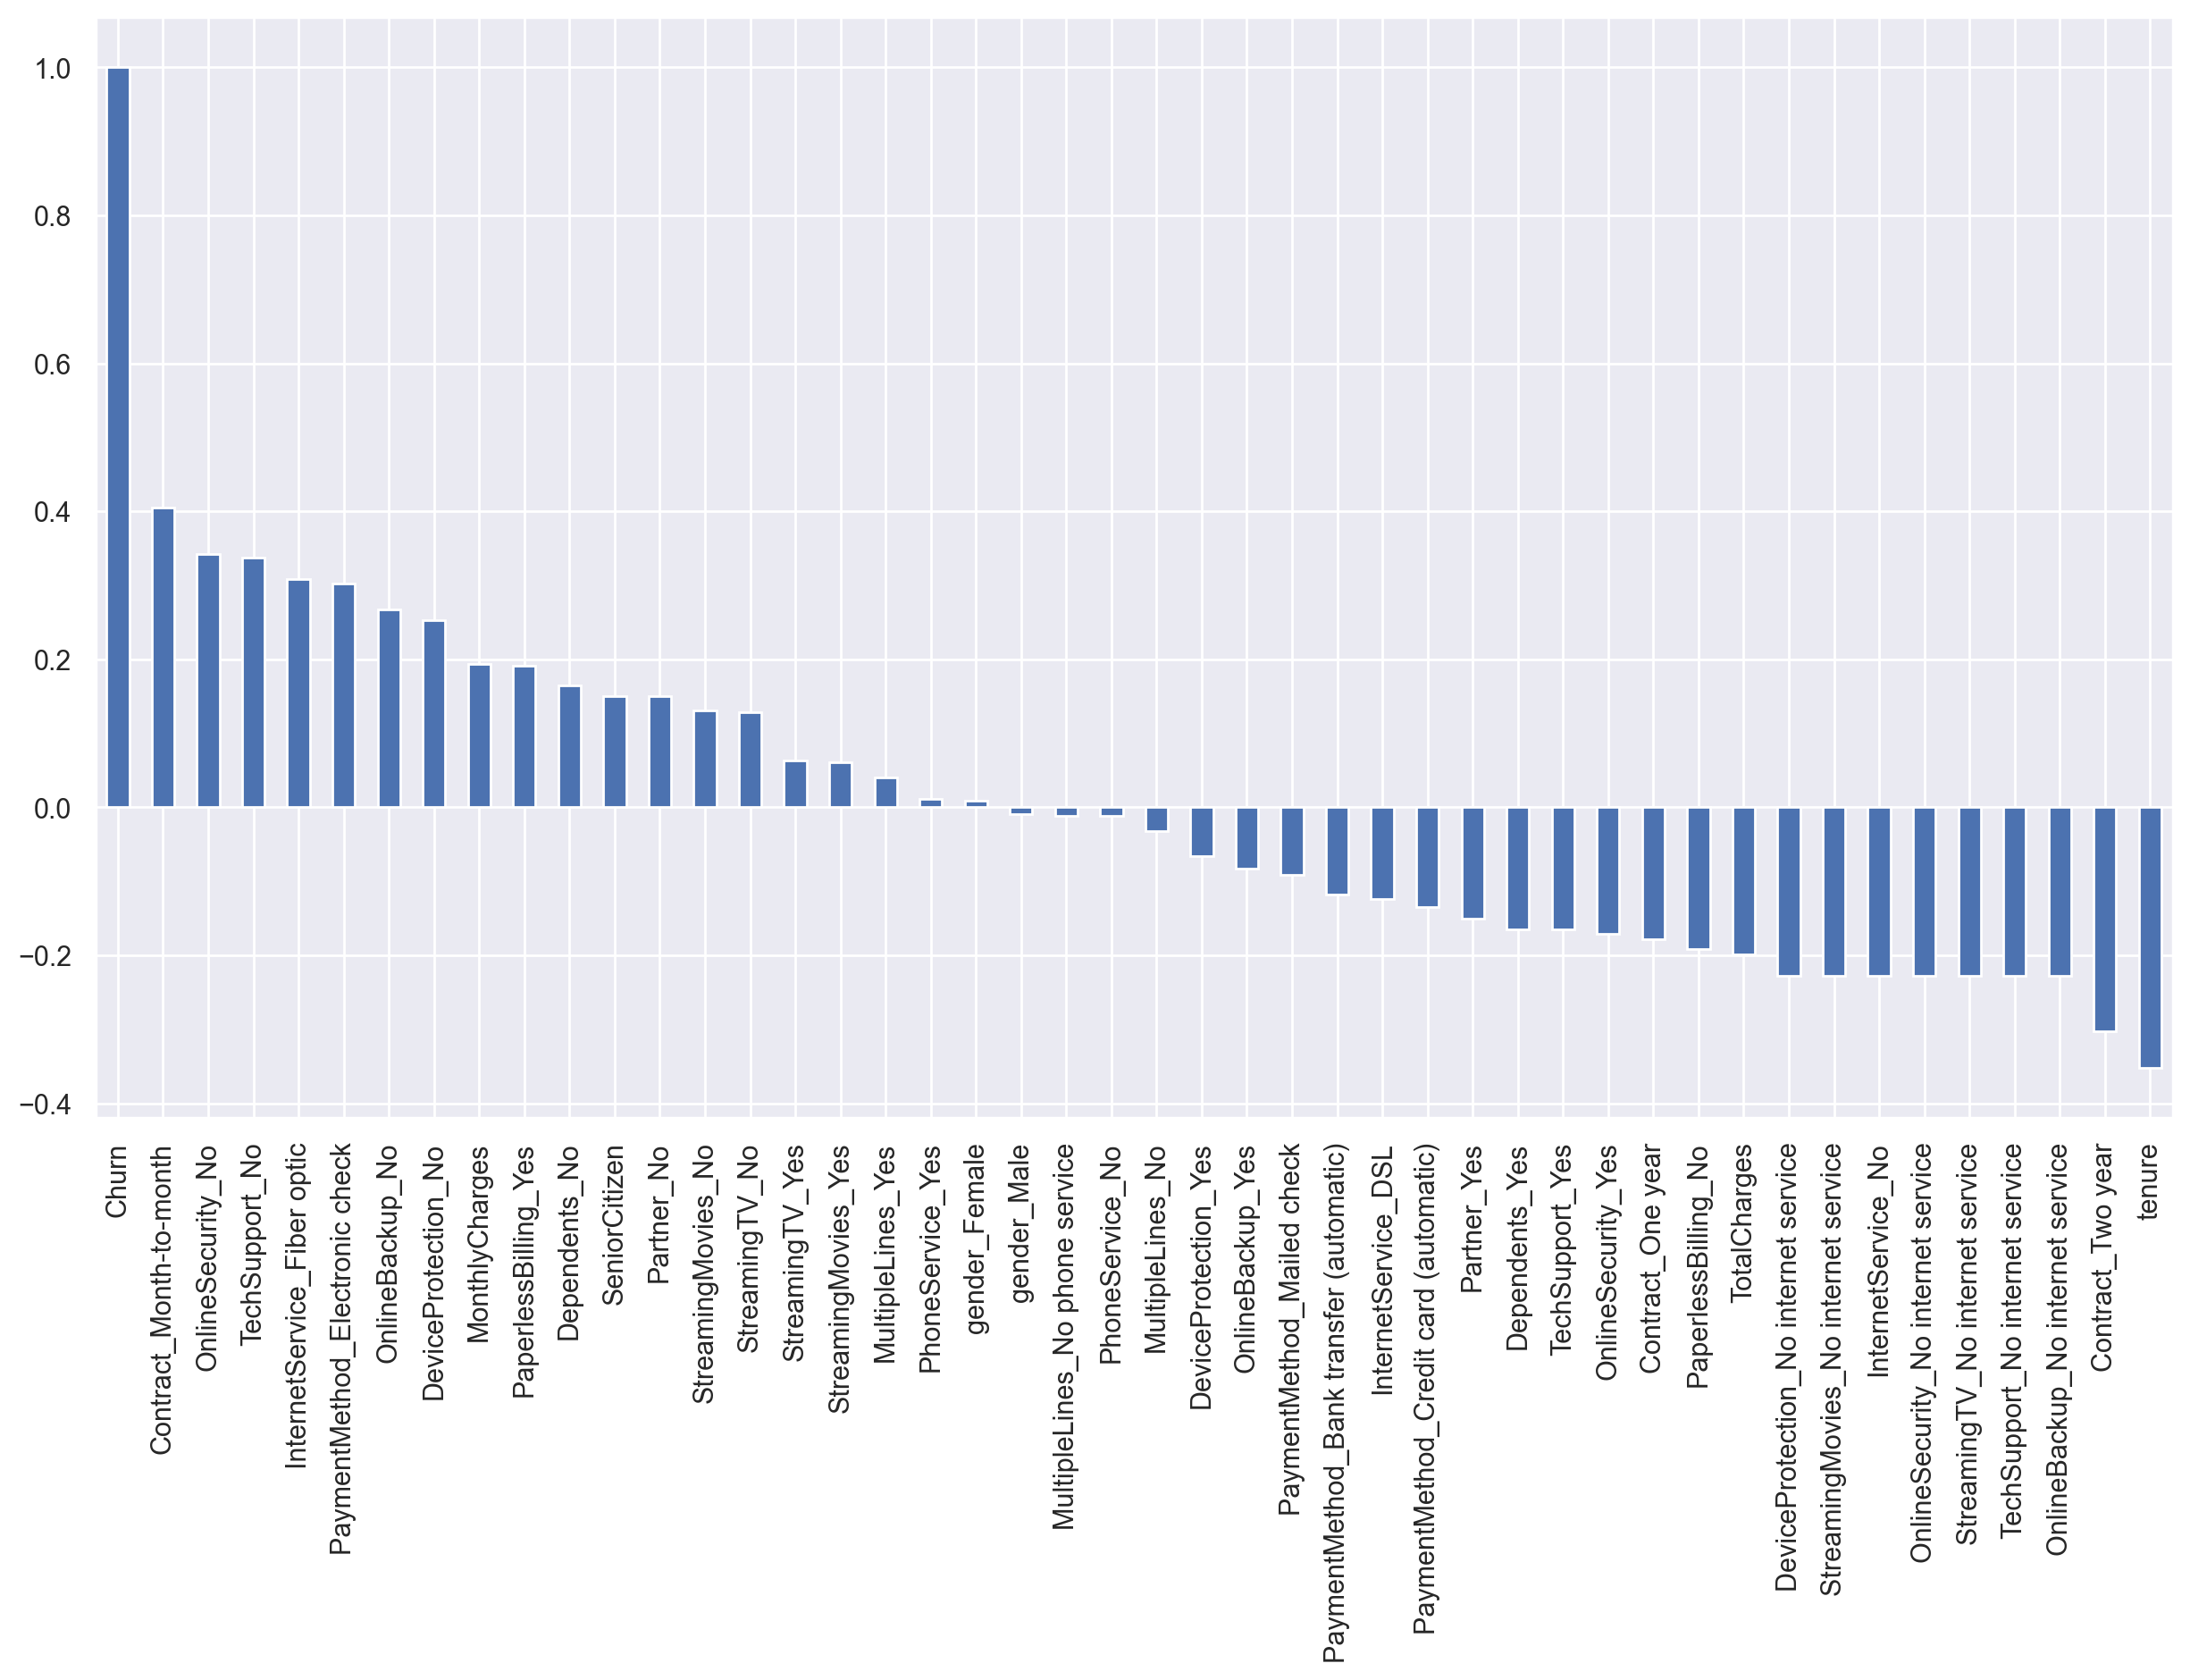

In [33]:
sns.set()
plt.figure(figsize=(15,8), dpi=200)

df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')